# Pricing(Ratemaking) Worker's Compensation Premiums using Actuarial Techniques

# Mount Google Drive

In [31]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",None)

In [32]:
# export dataset from drive to colab
# from google.colab import drive
# drive.mount('/content/drive')

filepath = "./wkcomp_pos.csv"

dataset = pd.DataFrame(pd.read_csv(filepath))
dataset # the worker's compensation dataset

,GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_D,CumPaidLoss_D,BulkLoss_D,EarnedPremDIR_D,EarnedPremCeded_D,EarnedPremNet_D,Single,PostedReserve97_D
0,86,Allstate Ins Co Grp,1988,1988,1,367404,70571,127737,400699,5957,394742,0,281872
1,86,Allstate Ins Co Grp,1988,1989,2,362988,155905,60173,400699,5957,394742,0,281872
2,86,Allstate Ins Co Grp,1988,1990,3,347288,220744,27763,400699,5957,394742,0,281872
3,86,Allstate Ins Co Grp,1988,1991,4,330648,251595,15280,400699,5957,394742,0,281872
4,86,Allstate Ins Co Grp,1988,1992,5,354690,274156,27689,400699,5957,394742,0,281872
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,44300,Tower Ins Co Of NY,1997,2002,6,334,287,15,4387,3374,1013,1,1187
13196,44300,Tower Ins Co Of NY,1997,2003,7,318,293,2,4387,3374,1013,1,1187
13197,44300,Tower Ins Co Of NY,1997,2004,8,323,300,7,4387,3374,1013,1,1187
13198,44300,Tower Ins Co Of NY,1997,2005,9,310,297,0,4387,3374,1013,1,1187


In [33]:
# dataset columns
columns = dataset.columns
print("Columns/Features present in dataset:\n")
for i in columns:
    print(i)

Columns/Features present in dataset:

GRCODE
GRNAME
AccidentYear
DevelopmentYear
DevelopmentLag
IncurLoss_D
CumPaidLoss_D
BulkLoss_D
EarnedPremDIR_D
EarnedPremCeded_D
EarnedPremNet_D
Single
PostedReserve97_D


In [35]:
# # create a heatmap or correlation map for dataset, with proper spacing
# import seaborn as sns

# plt.figure(figsize=(20, 20))
# sns.heatmap(dataset.corr(), annot=True, linewidths=0.2, linecolor="black", fmt=".2f")
# plt.show()

We see that there's a strong positive correlation between the following features:
- PostedReserve97_D with IncurLoss_D, CumPaidLoss_D, EarnedPremDIR_D and EarnedPremNet_D  
- EarnedPremNet_D with CumPaidLoss_D and IncurLoss_D

In [36]:
# missing values
if(dataset.isnull().any().sum() == 0):
    print("No missing values present in dataset")
else:
    print("Missing values present in dataset")

No missing values present in dataset


# Choose your Company using GRCODE

In [37]:
# Companies in dataset
dataset["GRCODE-GRNAME"] = dataset['GRCODE'].astype('str')+"-"+dataset['GRNAME']
companies = dataset["GRCODE-GRNAME"]
print("Number of Companies present in dataset {}\n".format(len(pd.unique(companies))))
for i in pd.unique(companies):
    print(i)

Number of Companies present in dataset 132

86-Allstate Ins Co Grp
337-California Cas Grp
353-Celina Mut Grp
388-Federal Ins Co Grp
460-Buckeye Ins Grp
655-FM Global
671-Farm Bureau Of MI Grp
711-Patrons Grp
715-West Bend Mut Ins Grp
965-Secura Ins Co
1066-Island Ins Cos Grp
1090-Kentucky Farm Bureau Mut Ins Grp
1236-Shelter Ins Cos Grp
1252-Penn Miller Grp
1538-Farmers Automobile Grp
1767-State Farm Mut Grp
2135-Erie Ins Exchange Grp
2143-Farmers Alliance Mut & Affiliates
2623-Canal Ins Co Grp
2712-Pennsylvania Natl Ins Grp
3000-Horace Mann Grp
3034-Preferred Risk Mut Grp
3240-NC Farm Bureau Ins Grp
4839-FL Farm Bureau Grp
5010-Capitol Transamerican Grp
5185-Grinnell Mut Grp
5940-American Contractors Ins Grp
6408-Mutual Benefit Grp
6807-Amerisafe Grp
7080-New Jersey Manufacturers Grp
7714-Keystone Ins Grp
8168-Commerce Grp Inc
8427-Farm Bureau Grp
8559-Millers Mut Ins Assoc
8672-Protective Ins Grp
9466-Lumber Ins Cos
10011-Mada Ins Exchange
10022-Agway Ins Co
10048-Hyundai Marine & Fi

The company "Allstate Ins Co Grp" with GRCODE = 86 is selected for this project

In [38]:
safe = [86, 337, 353, 388, 671]

In [39]:
# the selected grcode
slt_comp = 337

# Function for Loss Development using Chain-Ladder Method

In [40]:
# python class that consists of 4 different averaging methods for averaging loss-development factors
class AveragingMethods:
    def __init__(self, data):
        '''Here, Data is of type list'''
        self.data = data
    def SimpleAvg(self): # simple average
        sum = 0
        for i in self.data:
            sum += i
        return round( sum/len(self.data), 4)
    def VolumeAvg(self, dt1, dt2): # volume-weighted average
        sum1 = 0
        for i in dt1:
            sum1 += i
        sum2 = 0
        for j in dt2:
            sum2 += j
        return round( sum1/sum2,4)
    def MedialAvg(self): # medial average
        minimum = min(self.data)
        maximum = max(self.data)
        sum = 0
        if len(self.data) > 2:
            for i in self.data:
                sum += i
            sum -= (maximum+minimum)
            return round( sum/(len(self.data)-2),4)
        else:
            return  round( (maximum+minimum)/2,4)
    def GeometricAvg(self): # geometric average
        sum = 1
        for i in self.data:
            sum *= i
        return round( sum**(1/len(self.data)),4)


def LossData(grcode):
    '''This function extracts the loss data of a specific company corresponding to its GRCODE
        Here data is of type: dataframe'''
    company = dataset[dataset["GRCODE"]==grcode]
    return(company)


def createLossTriangle(data):
    '''This function extracts and creates Loss triangles
        Here data is of type: dataframe'''
    trframe = {}      # dict containing loss triangle values for various accident years
    for i in range(1988,1998):
        L = []
        for j in range(i,1998):
            condition = ( (data['AccidentYear']==i) & (data['DevelopmentYear']==j) )
            #print(int(data.loc[condition]['CumPaidLoss_D']))
            L.append(int(data.loc[condition]['CumPaidLoss_D']))
        i = int(i)
        trframe[i] = L
    return trframe


def displayTriangleData(data):
    '''This function displays Loss Triangle data
       Here data is of type: dictionary'''
    for i in data.keys():
        print(i, end = "\t\t")
        for j in data[i]:
            print(j, end = "\t")
        print("\n")


def computeLDF(data):
    '''This function computes Loss Development Factors
       Here data is of type: dictionary'''
    trframe = {}
    for i in data.keys():
        L = []
        for j in range(len(data[i])-1):
            ldf = data[i][j+1]/data[i][j]
            L.append( round(ldf,4) )
        i = int(i)
        trframe[i] = L
    return trframe


def computeAverageLDF(ldf_info, loss_info):
    '''This function computes various Averages of Loss Development Factors
       Here data is of type: dictionary'''
    print("Available averaging methods:\n\
            1. Simple Average :- Latest 5\n\
            2. Volume-Weighted Average :- Latest 5\n\
            3. Medial Average :- Latest 5\n\
            4. Geometric Average :- Latest 5\n")
    DK = list(ldf_info.keys())
    DK = sorted(DK, reverse=True)
    trframe = {
        'SimpleAvg':[],
        'VolumeAvg':[],
        'MedialAvg':[],
        'GeometricAvg':[]
    }
    # for Medial, Simple and Geometric Averages
    for i in range(0,10):
        L = []
        c = 1
        for j in DK:
            try:    # to avoid Index Out of Bounds
                if ldf_info[j][i] and c<=5:
                    L.append(ldf_info[j][i])
                    c+=1
            except:
                pass
        if(L!=[]):
            obj = AveragingMethods(L)               # object of class Averaging methods
            simp_avg = obj.SimpleAvg()
            med_avg  = obj.MedialAvg()
            geo_avg  = obj.GeometricAvg()
            trframe['SimpleAvg'].append(simp_avg)
            trframe['MedialAvg'].append(med_avg)
            trframe['GeometricAvg'].append(geo_avg)
    # only for Volume-Weighted Average
    for i in range(1,10):
        L1 = []
        L2 = []
        c = 1
        for j in DK:
            try:
                if loss_info[j][i] and loss_info[j][i-1] and c<=5:
                    L1.append(loss_info[j][i])
                    L2.append(loss_info[j][i-1])
                    c+=1
            except:
                pass
        if(L1!=[] and L2!=[]):
            obj = AveragingMethods(L1)
            vol_avg = obj.VolumeAvg(L1, L2)
            trframe['VolumeAvg'].append(vol_avg)
    return trframe



# the loss data of selected company
loss_data = LossData(slt_comp)

print("Loss Development Triangle\n")
loss_triangle = createLossTriangle(loss_data)
displayTriangleData(loss_triangle)
print("\n")

print("Loss Development Factors (Age-to-Age factors)\n")
ldf_triangle = computeLDF(loss_triangle)
displayTriangleData(ldf_triangle)
print("\n")

avg_ldf = computeAverageLDF(ldf_triangle, loss_triangle)
for i in avg_ldf.keys():
    print(i,"\t",avg_ldf[i],"\n")

Loss Development Triangle

1988		9558	22778	33298	40348	45146	48048	49782	50623	51812	51939	

1989		7913	19472	29622	36816	40975	43302	44707	45871	46229	

1990		8744	24302	35406	43412	48057	50897	52879	53956	

1991		13301	32950	47201	56394	61650	65039	66566	

1992		11424	29086	42034	50910	56406	59437	

1993		11792	27161	38229	46722	50742	

1994		11194	26893	38488	45580	

1995		12550	31604	44045	

1996		13194	31474	

1997		9372	



Loss Development Factors (Age-to-Age factors)

1988		2.3831	1.4618	1.2117	1.1189	1.0643	1.0361	1.0169	1.0235	1.0025	

1989		2.4608	1.5213	1.2429	1.113	1.0568	1.0324	1.026	1.0078	

1990		2.7793	1.4569	1.2261	1.107	1.0591	1.0389	1.0204	

1991		2.4773	1.4325	1.1948	1.0932	1.055	1.0235	

1992		2.546	1.4452	1.2112	1.108	1.0537	

1993		2.3033	1.4075	1.2222	1.086	

1994		2.4024	1.4312	1.1843	

1995		2.5182	1.3937	

1996		2.3855	

1997		



Available averaging methods:
            1. Simple Average :- Latest 5
            2. Volume-Weighted Average :- Latest 5
      

C:\Users\Arrnav Dutta\AppData\Local\Temp\ipykernel_11476\951641593.py:53: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  L.append(int(data.loc[condition]['CumPaidLoss_D']))


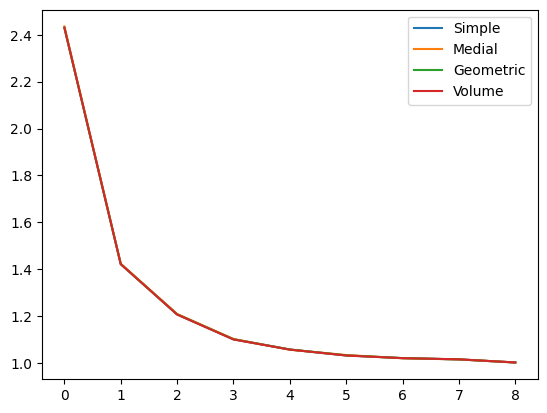

In [41]:
plt.plot(avg_ldf['SimpleAvg'])
plt.plot(avg_ldf['MedialAvg'])
plt.plot(avg_ldf['GeometricAvg'])
plt.plot(avg_ldf['VolumeAvg'])

plt.legend( ['Simple','Medial','Geometric','Volume'] , loc='upper right')

In [42]:
# Select LDF. Here we take the Volume-Weighted Averages.
selected_Ldf = avg_ldf['VolumeAvg']
print("Selected LDF (from Volume-Weighted Averages):\n",selected_Ldf)

# We select an arbitrary tail factor
tail = 1.0000
selected_Ldf.append(tail)

# Cumulative Loss Development factors
cdf = []
f = 1
selected_Ldf = sorted( selected_Ldf, reverse=False)
for i in range(1, len(selected_Ldf)+1):
    f = 1
    for j in range(0, i):
        f*=selected_Ldf[j]
    cdf.append( round( f,4) )

print("\nCumulative Development Factor (CDF):\n", sorted(cdf, reverse=True))


Selected LDF (from Volume-Weighted Averages):
 [2.4307, 1.4218, 1.2069, 1.1006, 1.0574, 1.0321, 1.0209, 1.016, 1.0025]

Cumulative Development Factor (CDF):
 [5.2095, 2.1432, 1.5074, 1.249, 1.1348, 1.0732, 1.0398, 1.0185, 1.0025, 1.0]


In [43]:
# Projected Ultimate Losses
proj_ultLosses = {}
for i in range(0, len(cdf)):
    for j in range(0, len(loss_triangle)):
        if(i==j):
            proj_ultLosses[ list(loss_triangle.keys())[j] ] = round( list(loss_triangle.values())[i][-1]*cdf[i],4)
print("Projected Ulimate Losses\n")
for i in proj_ultLosses.keys():
    print(i,"\t==>",proj_ultLosses[i])

Projected Ulimate Losses

1988 	==> 51939.0
1989 	==> 46344.5725
1990 	==> 54954.186
1991 	==> 69215.3268
1992 	==> 63787.7884
1993 	==> 57582.0216
1994 	==> 56929.42
1995 	==> 66393.433
1996 	==> 67455.0768
1997 	==> 48823.434


Lets evaluate the closeness of our projected ultimate losses to the actual ultimate losses.

In [44]:
# metrics used: mean absolute error, and r^2 coefficient
from sklearn.metrics import mean_absolute_error as mae, r2_score as r2
# Actual Ultimate Losses
act_ultLosses = {}
for i in range(1988,1998):
        condition = ( (loss_data['AccidentYear']==i) & (loss_data['DevelopmentLag']==10) )
        act_ultLosses[i] = int( loss_data.loc[condition]['CumPaidLoss_D'])
print("Actual Ulimate Losses\n")
for i in act_ultLosses.keys():
    print(i,"\t==>",act_ultLosses[i])

print( "\nMean Absolute Error =",mae(list(act_ultLosses.values()), list(proj_ultLosses.values())) )
print("\nR^2 coefficient =", r2(list(act_ultLosses.values()), list(proj_ultLosses.values()) ) )

Actual Ulimate Losses

1988 	==> 51939
1989 	==> 46483
1990 	==> 54857
1991 	==> 68965
1992 	==> 63406
1993 	==> 57917
1994 	==> 55255
1995 	==> 67011
1996 	==> 68225
1997 	==> 55377

Mean Absolute Error = 1081.818329999999

R^2 coefficient = 0.9094651926931193


C:\Users\Arrnav Dutta\AppData\Local\Temp\ipykernel_11476\1424264298.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  act_ultLosses[i] = int( loss_data.loc[condition]['CumPaidLoss_D'])


The R^2 coefficient is close to 1, which is very good. This means that Chain-Ladder Method is performing sufficiently well.

# Semi-Stochastic Method for Loss Development

In [45]:
# loss_triangle
# ldf_triangle

# Expectations
def Avg(ldf):
    try:
        return sum(ldf)/(len(ldf)-1)
    except:
        return 0

def ldf_colwise(ldf_tri):
    stoc_ldf = {}
    i = 1
    for k in range(0,len(ldf_tri.keys())):
        L = []
        for j in ldf_tri.keys():
            try:
                L.append(ldf_tri[j][k])
            except:
                pass
        L.append(0)
        stoc_ldf[i] = L
        i+=1
    return stoc_ldf

def change_keys(data):
    k = {}
    for i in data.keys():
        k[i-1987] = data[i]
    return k

def calcUlt(avg, tridata):
    ult = {}
    n = len(tridata.keys())
    i = 2
    j = len(avg.keys())-1
    mult = 1
    ult[1988] = tridata[1][9]
    while(i!=n+1 and j!=-1):
            print(tridata[i][j-1])

            mult*=avg[j]
            print(mult)
            mm = tridata[i][j-1]*mult
            ult[1988+i-1] = round(mm,3)
            i+=1
            j-=1
    return ult

#displayTriangleData(ldf_triangle)
stoc = ldf_colwise(ldf_triangle)
print(stoc)

avg_ldf = {}
for i in stoc.keys():
    avg_ldf[i] = Avg(stoc[i])
print(avg_ldf)

triloss = change_keys(loss_triangle)
#displayTriangleData(triloss)
ultclaims = calcUlt(avg_ldf,triloss)
print(ultclaims)


{1: [2.3831, 2.4608, 2.7793, 2.4773, 2.546, 2.3033, 2.4024, 2.5182, 2.3855, 0], 2: [1.4618, 1.5213, 1.4569, 1.4325, 1.4452, 1.4075, 1.4312, 1.3937, 0], 3: [1.2117, 1.2429, 1.2261, 1.1948, 1.2112, 1.2222, 1.1843, 0], 4: [1.1189, 1.113, 1.107, 1.0932, 1.108, 1.086, 0], 5: [1.0643, 1.0568, 1.0591, 1.055, 1.0537, 0], 6: [1.0361, 1.0324, 1.0389, 1.0235, 0], 7: [1.0169, 1.026, 1.0204, 0], 8: [1.0235, 1.0078, 0], 9: [1.0025, 0], 10: [0]}
{1: 2.4728777777777777, 2: 1.4437625, 3: 1.2133142857142858, 4: 1.1043500000000002, 5: 1.05778, 6: 1.0327250000000001, 7: 1.0211, 8: 1.01565, 9: 1.0025, 10: 0}
46229
1.0025
53956
1.018189125
66566
1.0396729155374997
59437
1.0736962116984645
50742
1.1357343788104017
45580
1.2542482612392674
44045
1.5217973331939065
31474
2.1971139222653675
9372
5.433194193616199
{1988: 51939, 1989: 46344.572, 1990: 54937.412, 1991: 69206.867, 1992: 63817.282, 1993: 57629.434, 1994: 57168.636, 1995: 67027.564, 1996: 69151.964, 1997: 50919.896}


# Calculating Rate and Benefit Adjustment Factors
We use a simple general formula derived by Richard A. Bill for automating the calculation of rate and benefit adjustment factors. This is based on the parallelogram method. More details on the formula can be found in the paper by Richard A. Bill on:
https://www.casact.org/abstract/generalized-earned-premium-rate-adjustment-factors


We exclude any fluctuations arising due to legal changes.

## Testing the formula with a sample case

In [46]:
import datetime
T = 1; E = 1;
start_date = datetime.date(2015,1,1)
rate_date = datetime.date(2015,4,1)

def months_between(date1,date2):

    m1=date1.year*12+date1.month
    m2=date2.year*12+date2.month
    months=m1-m2

    return months/12

D = months_between(rate_date, start_date)

A = D+T
B = max( A-E, 0 )
C = max( D, 0 )

P = 1 - ( (pow(A,2)-pow(B,2)-pow(C,2)) / (2*E*T) )
P


0.28125

In [47]:
rate_changes = {
            datetime.date(2015,4,1):0.05, datetime.date(2016,1,1):0.1,
                datetime.date(2017,7,1):-0.02,
                }
earned_prem = {2015: 20400, 2016: 21000, 2017: 22800, 2018: 23200}

# first calculate the rate change indeces
rates = list(rate_changes.values())
rate_index =[1.00]+[ (1+i) for i in rates ] # including initial index without changes = 1.00 (rate change = 0%)
print("Rate change indeces:\n",rate_index)
cum_index = []
f = 1
for i in rate_index:
    f *= i
    cum_index.append( round(f, 4))
print("Cumulative rate change indeces:\n",cum_index)
current_cum_rate_index = cum_index[-1]

Rate change indeces:
 [1.0, 1.05, 1.1, 0.98]
Cumulative rate change indeces:
 [1.0, 1.05, 1.155, 1.1319]


In [48]:
import datetime
T = 1; E = 1;

def months_between(date1,date2):

    m1=date1.year*12+date1.month
    m2=date2.year*12+date2.month
    months=m1-m2

    return months/12



def find_remains(L):
    if L!=[]:
        L.append(0)
        to_return = []
        max = 1
        for i in range(0, len(L)):
            if L[i]!=0:
                diff = max - L[i]
                to_return.append(round( diff,5))
                max = L[i]
                if L[i+1]==0:
                    to_return.append(round( max,5))
            else:
                to_return.append(0)

        to_return.pop()
        return to_return




def earnedPortion(rate_dates, earned_prem_years):

    portion = {}
    for i in earned_prem_years:
        portion[i] = []
    for i in earned_prem_years:
        start_date = datetime.date(i,1,1)
        for j in rate_dates:

            if months_between(j, start_date)<1 and months_between(j, start_date)>-1:

                D = months_between(j, start_date)

                A = D+T
                B = max( A-E, 0 )
                C = max( D, 0 )

                P = 1 - ( (pow(A,2)-pow(B,2)-pow(C,2)) / (2*E*T) )
                portion[i].append( round(P, 5))
            else:
                portion[i].append(0)


    for i in portion.keys():
        portion[i] = find_remains(portion[i])
    return(portion)


rate_effec_dates = list( rate_changes.keys())
years_toAdjust = list( earned_prem.keys() )
earned_PremPortion = earnedPortion(rate_effec_dates, years_toAdjust)
print("The portion earned by the premium in the years w.r.t. the rate changes are:\n",earned_PremPortion)

The portion earned by the premium in the years w.r.t. the rate changes are:
 {2015: [0.71875, 0.28125, 0, 0], 2016: [0.03125, 0.46875, 0.5, 0], 2017: [0, 0, 0.875, 0.125], 2018: [0, 0, 0.125, 0.875]}


In [49]:
# Average Cumulative Rate Level Indices

def AvgCumulIndices(L, cumul_indices):
    prod = L*cumul_indices
    sum = 0
    for i in prod:
        sum+=i
    return round(sum, 5)

for i in earned_PremPortion.keys():
    earned_PremPortion[i] = np.array(earned_PremPortion[i])
cum_index = np.array(cum_index)

avg_CumulIndices = {}
for i in earned_PremPortion.keys():
    avg_CumulIndices[i] = AvgCumulIndices(earned_PremPortion[i], cum_index)

print("The average cumulative rate level indices are:\n",avg_CumulIndices)


The average cumulative rate level indices are:
 {2015: 1.01406, 2016: 1.10094, 2017: 1.15211, 2018: 1.13479}


In [50]:
# Finally, On-Level Factors
onlevel = {}
for i in avg_CumulIndices.keys():
    onlevel[i] = round( current_cum_rate_index/avg_CumulIndices[i], 5 )
print("On-Level Factors for premium:\n",onlevel)

On-Level Factors for premium:
 {2015: 1.11621, 2016: 1.02812, 2017: 0.98246, 2018: 0.99745}


## Adjusting Premiums for Rate Changes


In [51]:
# Net Premium Earned (Earned Premium - Ceded Earned Premium(or Reinsurance costs))
net_prem_earned = {}
for i in range(1988,1998):
    net_prem_earned[i] = list( loss_data[loss_data['AccidentYear']==i]['EarnedPremNet_D'] )[0]

print("Net Premium Earned\n")
for i in net_prem_earned.keys():
    print(i,"\t==>",net_prem_earned[i])

Net Premium Earned

1988 	==> 99779
1989 	==> 85110
1990 	==> 82187
1991 	==> 94997
1992 	==> 100508
1993 	==> 114352
1994 	==> 106540
1995 	==> 74652
1996 	==> 60244
1997 	==> 45933


We will assume some rate changes.

In [52]:
# Assume rate changes
rate_changes = {
            datetime.date(1988,4,1):0.05, #datetime.date(1989,1,1):0.1,
                datetime.date(1990,7,1):-0.02, #datetime.date(1991,4,1):-0.04,
            datetime.date(1991,5,1):0.11,  #datetime.date(1992,3,1):0.07,
            datetime.date(1993,8,1):-0.05, #datetime.date(1994,2,1):0.08,
            datetime.date(1996,8,1):0.15
                }
# first calculate the rate change indeces
rates = list(rate_changes.values())
rate_index =[1.00]+[ (1+i) for i in rates ] # including initial index of segment without changes = 1.00 (rate change = 0%)
print("Rate change indeces:\n",rate_index)
cum_index = []
f = 1
for i in rate_index:
    f *= i
    cum_index.append( round(f, 4))
print("Cumulative rate change indeces:\n",cum_index)
current_cum_rate_index = cum_index[-1]
print("Current Cumulative Rate Level Index =",current_cum_rate_index)

Rate change indeces:
 [1.0, 1.05, 0.98, 1.11, 0.95, 1.15]
Cumulative rate change indeces:
 [1.0, 1.05, 1.029, 1.1422, 1.0851, 1.2478]
Current Cumulative Rate Level Index = 1.2478


In [53]:
# To calculate the portions earned by premiums under each rate change
import datetime
T = 1; E = 1;

def months_between(date1,date2):
    '''This function calculates the difference between 2 given dates in months
    date1, date2 are in datetime.date() format'''
    m1=date1.year*12+date1.month
    m2=date2.year*12+date2.month
    months=m1-m2    # difference between the dates

    return months/12



def find_remains(rate_dates, earned_prem_year, L):
    '''This function calculates the remaining portions of earned premium under the rate changes
       rate_dates is a dictionary containing the dates of rate changes, earned_prem_year is the year whose premiums are being adjusted, L is a list'''
    if L!=[]:
        L.append(0) # appending 0 as a means for calculating the last portion
        to_return = []  # the list that contains the portions
        max = 1 # maximum value (total area of an year of earned premium)
        for i in range(0, len(L)):
            if L[i]!=0:
                diff = max - L[i]   # calculate remaining portion
                to_return.append(round( diff,5))
                max = L[i]
                if L[i+1]==0:   # for the last portion to be appended
                    to_return.append(round( max,5))
            else:
                to_return.append(0)

        if to_return.count(0) == len(to_return):
            to_return = earnedPortion_ForUnaffectedYear(rate_dates, earned_prem_year, to_return)

        to_return.pop()
        return to_return



def earnedPortion_ForUnaffectedYear(rate_dates, earned_prem_year, L):
    '''This function sets the portion earned by premium for that year as 1 if there are no rate changes affecting that year
    rate_dates is a dictionary containing the dates of rate changes, earned_prem_year is the year whose premiums are being adjusted, L is a list'''
    c = 0
    start_date = datetime.date(earned_prem_year,1,1)
    for i in rate_dates:
        if( months_between(i, start_date)>0 ):      # checking where to insert 1
            break
        else:
            c+=1
    L.insert(c,1)   # insert 1 as portion earned by premium
    return L



def earnedPortion(rate_dates, earned_prem_years):
    '''This function calculates the portion of earned premium under given rate changes
    rate_dates is a dictionary containing the dates of rate changes and earned_prem_years is also a dictionary containing the years in which premium is earned'''
    portion = {}
    for i in earned_prem_years:
        portion[i] = []
    for i in earned_prem_years:
        start_date = datetime.date(i,1,1)
        for j in rate_dates:

            if months_between(j, start_date)<1 and months_between(j, start_date)>-1:
                # algorithm for calculating portions of earned premium
                D = months_between(j, start_date)

                A = D+T
                B = max( A-E, 0 )
                C = max( D, 0 )

                P = 1 - ( (pow(A,2)-pow(B,2)-pow(C,2)) / (2*E*T) )
                portion[i].append( round(P, 5))
            else:
                portion[i].append(0)

    # print(portion)
    for i in portion.keys():
        portion[i] = find_remains(rate_dates, i, portion[i])
    return(portion)


rate_effec_dates = list( rate_changes.keys())
years_toAdjust = list( net_prem_earned.keys() )
earned_NetPremPortion = earnedPortion(rate_effec_dates, years_toAdjust)
print("The portion earned by the premium in the years w.r.t. the rate changes are:\n",earned_NetPremPortion)

The portion earned by the premium in the years w.r.t. the rate changes are:
 {1988: [0.71875, 0.28125, 0, 0, 0, 0], 1989: [0.03125, 0.96875, 0, 0, 0, 0], 1990: [0, 0.875, 0.125, 0, 0, 0], 1991: [0, 0.125, 0.65278, 0.22222, 0, 0], 1992: [0, 0, 0.05556, 0.94444, 0, 0], 1993: [0, 0, 0, 0.91319, 0.08681, 0], 1994: [0, 0, 0, 0.17014, 0.82986, 0], 1995: [0, 0, 0, 0, 1, 0], 1996: [0, 0, 0, 0, 0.91319, 0.08681], 1997: [0, 0, 0, 0, 0.17014, 0.82986]}


In [54]:
# Average Cumulative Rate Level Indices

def AvgCumulIndices(L, cumul_indices):
    '''This function calculates the average cumulative rate level indices for the earned premium
    L, cumul_indices are numpy arrays where L contains the portions of earned premiums and cumul_indices contains the cumulative rate level indices'''
    prod = L*cumul_indices
    sum = 0
    for i in prod:
        sum+=i
    return round(sum, 5)

# changing to numpy arrays
for i in earned_NetPremPortion.keys():
    earned_NetPremPortion[i] = np.array(earned_NetPremPortion[i])
cum_index = np.array(cum_index)

avg_CumulIndices = {}
for i in earned_NetPremPortion.keys():
    avg_CumulIndices[i] = AvgCumulIndices(earned_NetPremPortion[i], cum_index)

print("\nThe Average Cumulative Rate Level Indices are:")
for i in avg_CumulIndices.keys():
    print(i,"\t==>",avg_CumulIndices[i])


The Average Cumulative Rate Level Indices are:
1988 	==> 1.01406
1989 	==> 1.04844
1990 	==> 1.04738
1991 	==> 1.05678
1992 	==> 1.13591
1993 	==> 1.13724
1994 	==> 1.09481
1995 	==> 1.0851
1996 	==> 1.09922
1997 	==> 1.22012


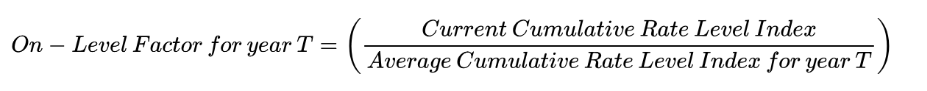

In [55]:
# On-Level Factors for the premiums
onlevel = {}
print("Current Cumulative Rate Level Index =",current_cum_rate_index)
for i in avg_CumulIndices.keys():
    onlevel[i] = round( current_cum_rate_index/avg_CumulIndices[i], 5 )
print("\nThe On-Level Factors are:")
for i in onlevel.keys():
    print(i,"\t==>",onlevel[i])

Current Cumulative Rate Level Index = 1.2478

The On-Level Factors are:
1988 	==> 1.2305
1989 	==> 1.19015
1990 	==> 1.19135
1991 	==> 1.18076
1992 	==> 1.0985
1993 	==> 1.09722
1994 	==> 1.13974
1995 	==> 1.14994
1996 	==> 1.13517
1997 	==> 1.02269


In [56]:
# On-Levelling the Premiums
AdjustedPrem = {}
for i in onlevel.keys():
    AdjustedPrem[i] = round( net_prem_earned[i] * onlevel[i], 5)
print("The On-Level Net Premiums are:\n")
for i in AdjustedPrem.keys():
    print(i,"\t==>",AdjustedPrem[i])

The On-Level Net Premiums are:

1988 	==> 122778.0595
1989 	==> 101293.6665
1990 	==> 97913.48245
1991 	==> 112168.65772
1992 	==> 110408.038
1993 	==> 125469.30144
1994 	==> 121427.8996
1995 	==> 85845.32088
1996 	==> 68387.18148
1997 	==> 46975.21977


## Adjusting Losses for Benefit Changes

In [57]:
# Assume benefit changes
benefit_changes = {
            datetime.date(1988,4,1):0.05,
            #     datetime.date(1989,1,1):0.1,
            datetime.date(1990,7,1):-0.02,
            #     datetime.date(1991,4,1):-0.04,
            datetime.date(1991,5,1):0.11,
            #     datetime.date(1992,3,1):0.07,
            datetime.date(1993,8,1):-0.05,
            #     datetime.date(1994,2,1):0.08,
            datetime.date(1996,8,1):0.15
                }
# first calculate the benefit change indeces
benefits = list(benefit_changes.values())
benefit_index =[1.00]+[ (1+i) for i in benefits ] # including initial index without changes = 1.00 (rate change = 0%)
print("Benefit change indeces:\n",benefit_index)
loss_lvl = []
f = 1
for i in benefit_index:
    f *= i
    loss_lvl.append( round(f, 4))
print("Loss Level indeces (Cumulative indeces):\n",loss_lvl)
current_loss_lvl = loss_lvl[-1]
print("Current Loss Level =",current_loss_lvl)

Benefit change indeces:
 [1.0, 1.05, 0.98, 1.11, 0.95, 1.15]
Loss Level indeces (Cumulative indeces):
 [1.0, 1.05, 1.029, 1.1422, 1.0851, 1.2478]
Current Loss Level = 1.2478


In [58]:
import datetime
T = 1; E = 1;

def months_between(date1,date2):
    '''This function calculates the difference between 2 given dates in months
    date1, date2 are in datetime.date() format'''
    m1=date1.year*12+date1.month
    m2=date2.year*12+date2.month
    months=m1-m2    # difference between the dates

    return months/12



def find_remains(ben_dates, loss_year, L):
    '''This function calculates the remaining portions of earned premium under the rate changes
       ben_dates is a list containing the dates of benefit changes, loss_year is the year whose losses are being adjusted, L is a list'''
    if L!=[]:
        L.append(0) # appending 0 as a means for calculating the last portion
        to_return = []  # the list that contains the portions
        max = 1 # maximum value (total area of an year of losses)
        for i in range(0, len(L)):
            if L[i]!=0:
                diff = max - L[i]   # calculate remaining portion
                to_return.append(round( diff,5))
                max = L[i]
                if L[i+1]==0:   # for the last portion to be appended
                    to_return.append(round( max,5))
            else:
                to_return.append(0)

        if to_return.count(0) == len(to_return):
            to_return = Portion_ForUnaffectedYear(ben_dates, loss_year, to_return)

        to_return.pop()
        return to_return



def Portion_ForUnaffectedYear(ben_dates, loss_year, L):
    '''This function sets the portion earned by premium for that year as 1 if there are no rate changes affecting that year
    ben_dates is a list containing the dates of benefit changes, loss_year is the year whose losses are being adjusted, L is a list'''
    c = 0
    start_date = datetime.date(loss_year,1,1)
    for i in ben_dates:
        if( months_between(i, start_date)>0 ):      # checking where to insert 1
            break
        else:
            c+=1
    L.insert(c,1)   # insert 1 as portion earned by premium
    return L



def LossPortion(ben_dates, loss_years):
    '''This function calculates the portion of earned premium under given rate changes
    ben_dates is a list containing the dates of benefit changes and loss_years is also a list containing the years in which losses occur'''
    portion = {}
    for i in loss_years:
        portion[i] = []
    for i in loss_years:
        start_date = datetime.date(i,1,1)
        for j in ben_dates:

            if months_between(j, start_date)<1 and months_between(j, start_date)>-1:
                # algorithm for calculating portions of earned premium
                D = months_between(j, start_date)

                A = D+T
                B = max( A-E, 0 )
                C = max( D, 0 )

                P = 1 - ( (pow(A,2)-pow(B,2)-pow(C,2)) / (2*E*T) )
                portion[i].append( round(P, 5))
            else:
                portion[i].append(0)

    # print(portion)
    for i in portion.keys():
        portion[i] = find_remains(ben_dates, i, portion[i])
    return(portion)


ben_effec_dates = list( benefit_changes.keys())
years_toAdjust = list( proj_ultLosses.keys() )
LossesPortion = LossPortion(ben_effec_dates, years_toAdjust)
print("The portion of the losses in the years w.r.t. the benefit changes are:\n",LossesPortion)

The portion of the losses in the years w.r.t. the benefit changes are:
 {1988: [0.71875, 0.28125, 0, 0, 0, 0], 1989: [0.03125, 0.96875, 0, 0, 0, 0], 1990: [0, 0.875, 0.125, 0, 0, 0], 1991: [0, 0.125, 0.65278, 0.22222, 0, 0], 1992: [0, 0, 0.05556, 0.94444, 0, 0], 1993: [0, 0, 0, 0.91319, 0.08681, 0], 1994: [0, 0, 0, 0.17014, 0.82986, 0], 1995: [0, 0, 0, 0, 1, 0], 1996: [0, 0, 0, 0, 0.91319, 0.08681], 1997: [0, 0, 0, 0, 0.17014, 0.82986]}


In [59]:
# Average Loss Levels

def AvgLossLevel(L, loss_levels):
    '''This function calculates the average Loss levels for the historical periods
    L, loss_levels are numpy arrays where L contains the portions of losses and loss_levels contains the loss levels'''
    prod = L*loss_levels
    sum = 0
    for i in prod:
        sum+=i
    return round(sum, 5)

for i in LossesPortion.keys():
    LossesPortion[i] = np.array(LossesPortion[i])
loss_lvl = np.array(loss_lvl)

avg_LossLvl = {}
for i in LossesPortion.keys():
    avg_LossLvl[i] = AvgLossLevel(LossesPortion[i], loss_lvl)

print("\nThe Average Loss Levels are:")
for i in avg_LossLvl.keys():
    print(i,"\t==>",avg_LossLvl[i])


The Average Loss Levels are:
1988 	==> 1.01406
1989 	==> 1.04844
1990 	==> 1.04738
1991 	==> 1.05678
1992 	==> 1.13591
1993 	==> 1.13724
1994 	==> 1.09481
1995 	==> 1.0851
1996 	==> 1.09922
1997 	==> 1.22012


In [60]:
# Adjustment Factors
adjusts = {}
print("Current Loss Level =",current_loss_lvl)
for i in avg_LossLvl.keys():
    adjusts[i] = round( current_loss_lvl/avg_LossLvl[i], 5 )
print("\nThe Adjustment Factors are:")
for i in adjusts.keys():
    print(i,"\t==>",adjusts[i])

Current Loss Level = 1.2478

The Adjustment Factors are:
1988 	==> 1.2305
1989 	==> 1.19015
1990 	==> 1.19135
1991 	==> 1.18076
1992 	==> 1.0985
1993 	==> 1.09722
1994 	==> 1.13974
1995 	==> 1.14994
1996 	==> 1.13517
1997 	==> 1.02269


In [61]:
# Adjusting the Losses
AdjustedLosses = {}
for i in adjusts.keys():
    AdjustedLosses[i] = round( proj_ultLosses[i] * adjusts[i], 5)
print("The Adjusted Losses are:\n")
for i in AdjustedLosses.keys():
    print(i,"\t==>",AdjustedLosses[i])

The Adjusted Losses are:

1988 	==> 63910.9395
1989 	==> 55156.99296
1990 	==> 65469.66949
1991 	==> 81726.68927
1992 	==> 70070.88556
1993 	==> 63180.14574
1994 	==> 64884.73715
1995 	==> 76348.46434
1996 	==> 76572.97953
1997 	==> 49931.23772


# Trending Loss Ratios

### We are getting data related to Annual Inflation Rates by country from World Bank's website: [data.worldbank.org](https://data.worldbank.org/indicator/FP.CPI.TOTL.ZG?locations=US&view=chart)

In [65]:
# Lets work on Inflation Rates first
filepath = "./605_InflationRates.xlsx"

inflation_rates = pd.DataFrame(pd.read_excel(filepath, sheet_name="justTheInflation"))
inflation_rates

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.032258,1.073966,3.643045,3.121868,3.991628,5.836688,5.555556,3.873375,5.215560,6.311080,3.361391,3.225288,2.999948,1.869489,2.280372,4.044021,2.883604,3.315247,3.656365,2.529129,3.397787,3.608024,5.392568,8.955987,-2.135429,2.078141,4.316297,0.627472,-2.372065,0.421441,0.474764,-0.931196,-1.028282,3.626041,4.257462,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.598394,15.224099,11.216471,14.238055,12.526893,15.069850,15.066512,14.461591,12.139918,11.567524,10.983863,13.006566,13.891972,12.563443,12.522254,12.558202,12.457914,17.678100,16.167612,13.135661,14.852815,12.288591,9.706586,10.249599,7.495256,7.819865,8.601485,5.840354,8.763754,7.449700,5.023421,8.558038,8.898164,8.450775,12.566645,8.954218,5.537538,8.971206,9.158707,5.750981,5.370290,5.245878,6.571396,6.399343,4.720811,4.653665,7.321106,6.824727,10.773751
2,Afghanistan,AFG,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.686269,6.784597,8.680571,26.418664,-6.811161,2.178538,11.804186,6.441213,7.385772,4.673996,-0.661709,4.383892,4.975952,0.626149,2.302373,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.799211,12.059765,10.671937,11.250000,7.354926,5.950965,0.248789,2.523659,0.869287,1.057361,1.741888,-0.062999,0.553456,31.841017,10.563289,4.914240,3.997142,4.471125,0.372266,2.530775,4.361529,3.188693,1.760904,0.694336,5.631634,4.415900,3.607368,8.452976,3.282440,1.784844,4.018699,4.578375,2.439201,1.768436,2.130817,1.487416,1.764635,1.784050,1.760112,2.437609,3.653533,7.967574
4,Angola,AGO,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.783784,299.509804,1378.527607,949.792531,2666.450593,4145.105982,219.176721,107.284822,248.195902,324.996872,152.561022,108.897436,98.224144,43.542107,22.953514,13.305210,12.251497,12.475829,13.730284,14.469656,13.482468,10.277905,8.777814,7.280387,9.353840,30.698958,29.842578,19.630594,17.079704,22.271564,25.754266,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.084813,-1.064727,-1.385189,0.621647,4.358497,9.350418,-2.410264,3.480508,7.336418,2.476738,1.767324,0.428958,-0.536929,0.273169,1.488234,1.053798,2.675992,0.198228,3.353691,11.580510
262,"Yemen, Rep.",YEM,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.000000,29.411765,35.752298,49.394155,55.081107,30.733733,2.176727,5.976509,8.660219,4.590000,11.911591,12.238534,10.832361,12.515095,11.8

In [66]:
# inflation rates in USA
inf_us = inflation_rates[inflation_rates['Country Name'] == "United States"]
inf_us

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
251,United States,USA,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,1.457976,1.070724,1.198773,1.239669,1.278912,1.585169,3.015075,2.772786,4.271796,5.462386,5.838255,4.292767,3.272278,6.17776,11.054805,9.143147,5.744813,6.501684,7.630964,11.254471,13.549202,10.334715,6.131427,3.212435,4.300535,3.545644,1.898048,3.664563,4.077741,4.827003,5.397956,4.234964,3.02882,2.951657,2.607442,2.80542,2.931204,2.33769,1.552279,2.188027,3.376857,2.826171,1.586032,2.270095,2.677237,3.392747,3.225944,2.852672,3.8391,-0.355546,1.640043,3.156842,2.069337,1.464833,1.622223,0.118627,1.261583,2.13011,2.442583,1.81221,1.233584,4.697859,8.0028


In [67]:
inf_us.iloc[0,1998-1960+4]

1.55227909874364

In [68]:
inf_index = {}
start = 1988; end = 1997
for i in range(start, end+1):
    inf_index[i] = inf_us.iloc[0, i-1960+4]

print("Inflation indeces are:\n",inf_index)

Inflation indeces are:
 {1988: 4.07774110744413, 1989: 4.82700303008944, 1990: 5.39795643990325, 1991: 4.23496396453849, 1992: 3.02881967814969, 1993: 2.95165696638559, 1994: 2.60744159215453, 1995: 2.80541968853662, 1996: 2.93120419993441, 1997: 2.33768993730735}


In [69]:
inf_avg = {}
keys = list(inf_index.keys())
for i in range(0,len(keys)):
    avg=0
    for j in range(i,len(keys)):
        avg+= inf_index[keys[j]]
    inf_avg[keys[i]] = avg/(j-i+1)

print("Average Inflation rates =",inf_avg)

Average Inflation rates = {1988: 3.51998966044435, 1989: 3.458017277444375, 1990: 3.286894058363741, 1991: 2.985313718143811, 1992: 2.7770386770780315, 1993: 2.7266824768637, 1994: 2.670438854483227, 1995: 2.6914379419261265, 1996: 2.6344470686208803, 1997: 2.33768993730735}


## Our Assumptions are:
### --> Policies are written uniformly over time.
### --> Premiums are earned uniformly over the policy period.
### --> Losses occur uniformly over the policy period.
### --> Policies have annual terms.


## Trend losses for inflation.
##### Our experience periods are the historical accident years from 1988 to 1997.
##### Future policy period begins in Jan 1, 1998. Inflation rate will be in effect for 12 months. Thus our forecast period average accident date is:
##### Midpoint of the period 1/1/1998 to 12/31/1999 = 1/1/1999

In [70]:
loss_inf_period = {}
loss_forecast_Date = datetime.date(1999,1,1)
for i in inf_index.keys():
    expDate = datetime.date(i,7,1)
    diff = months_between(loss_forecast_Date,expDate)
    loss_inf_period[i] = diff

print("The trend periods for losses are :\n", loss_inf_period)

loss_inf_factor = {}
for i in loss_inf_period.keys():
    loss_inf_factor[i] = (1 + (0.01*inf_avg[i]))**loss_inf_period[i]

print("The trend factors for losses are :\n", loss_inf_factor)

The trend periods for losses are :
 {1988: 10.5, 1989: 9.5, 1990: 8.5, 1991: 7.5, 1992: 6.5, 1993: 5.5, 1994: 4.5, 1995: 3.5, 1996: 2.5, 1997: 1.5}
The trend factors for losses are :
 {1988: 1.4379848464222695, 1989: 1.3812091144486356, 1990: 1.3163893271932503, 1991: 1.2468514717070853, 1992: 1.1948809881639835, 1993: 1.1594658084178389, 1994: 1.125911830979841, 1995: 1.0974122985214763, 1996: 1.0671681801399382, 1997: 1.035269487325222}


In [71]:
# Now we trend the losses
inf_trendedLosses = {}
for i in loss_inf_factor.keys():
    inf_trendedLosses[i] = AdjustedLosses[i]*loss_inf_factor[i]

print("The Projected_Ultimate_Losses\tBenefit_Adjusted_Losses\tInflation_Trended_Losses are:\n")
for i in inf_trendedLosses.keys():
    print(i,"\t  ===>",proj_ultLosses[i],"\t ===>",AdjustedLosses[i],"\t==>",inf_trendedLosses[i])

The Projected_Ultimate_Losses	Benefit_Adjusted_Losses	Inflation_Trended_Losses are:

1988 	  ===> 51939.0 	 ===> 63910.9395 	==> 91902.96252161046
1989 	  ===> 46344.5725 	 ===> 55156.99296 	==> 76183.34140193123
1990 	  ===> 54954.186 	 ===> 65469.66949 	==> 86183.57417150556
1991 	  ===> 69215.3268 	 ===> 81726.68927 	==> 101901.04279404716
1992 	  ===> 63787.7884 	 ===> 70070.88556 	==> 83726.36897945819
1993 	  ===> 57582.0216 	 ===> 63180.14574 	==> 73255.21875638598
1994 	  ===> 56929.42 	 ===> 64884.73715 	==> 73054.49320720222
1995 	  ===> 66393.433 	 ===> 76348.46434 	==> 83785.74373994437
1996 	  ===> 67455.0768 	 ===> 76572.97953 	==> 81716.24721292284
1997 	  ===> 48823.434 	 ===> 49931.23772 	==> 51692.28687589818


## Trend Premiums for inflation.
##### Trend will be estimated from earned premium data. The trend period will be from the average earned date in each historical period to the average earned date at the new rate level. Because of the uniform assumption, the average earned date of a period is the midpoint of the first and last dates that premiums could be earned in that period. So, these dates will depend on the policy term length.
##### Future policy period begins in Jan 1, 1998. Inflation rate will be in effect for 12 months. Thus our forecast period average earned date is:
##### Midpoint of the period 1/1/1998 to 12/31/1999 = 1/1/1999

In [72]:
prem_inf_period = {}
prem_forecast_Date = datetime.date(1999,1,1)
for i in inf_index.keys():
    expDate = datetime.date(i,1,1)
    diff = months_between(prem_forecast_Date,expDate)
    prem_inf_period[i] = diff

print("The trend periods for premium are :\n", prem_inf_period)

prem_inf_factor = {}
for i in prem_inf_period.keys():
    prem_inf_factor[i] = (1 + (0.01*inf_avg[i]))**prem_inf_period[i]

print("The trend factors for premium are :\n", prem_inf_factor)

The trend periods for premium are :
 {1988: 11.0, 1989: 10.0, 1990: 9.0, 1991: 8.0, 1992: 7.0, 1993: 6.0, 1994: 5.0, 1995: 4.0, 1996: 3.0, 1997: 2.0}
The trend factors for premium are :
 {1988: 1.4630744271811034, 1989: 1.4048873794184469, 1990: 1.3378485784268548, 1991: 1.2653258203591393, 1992: 1.211358528213734, 1993: 1.1751669735133035, 1994: 1.1408461782138526, 1995: 1.1120823306899619, 1996: 1.0811337893487467, 1997: 1.0473002781704457}


In [73]:
# Now we trend the premiums
inf_trendedPrems = {}
for i in prem_inf_factor.keys():
    inf_trendedPrems[i] = AdjustedPrem[i]*prem_inf_factor[i]

print("The Net_Premiums_Earned\tRate_Adjusted_Premiums\tInflation_Trended_Premiums are:\n")
for i in inf_trendedPrems.keys():
    print(i,"\t  ===>",net_prem_earned[i],"\t ===>",AdjustedPrem[i],"\t==>",inf_trendedPrems[i])

The Net_Premiums_Earned	Rate_Adjusted_Premiums	Inflation_Trended_Premiums are:

1988 	  ===> 99779 	 ===> 122778.0595 	==> 179633.43907336993
1989 	  ===> 85110 	 ===> 101293.6665 	==> 142306.19368087113
1990 	  ===> 82187 	 ===> 97913.48245 	==> 130993.41330455529
1991 	  ===> 94997 	 ===> 112168.65772 	==> 141929.8988481425
1992 	  ===> 100508 	 ===> 110408.038 	==> 133743.71841464602
1993 	  ===> 114352 	 ===> 125469.30144 	==> 147447.37924207316
1994 	  ===> 106540 	 ===> 121427.8996 	==> 138530.5551871954
1995 	  ===> 74652 	 ===> 85845.32088 	==> 95467.06452305804
1996 	  ===> 60244 	 ===> 68387.18148 	==> 73935.69265635282
1997 	  ===> 45933 	 ===> 46975.21977 	==> 49197.16073223882


# Expenses and Profits

## Assume fixed expense provision and variable expense provision. Also assume underwiting profit provision.

In [74]:
fixed_exp_provision = 0.08      # 8%
variable_exp_provision = 0.1    # 10%
profit_provision = 0.07         # 7%
ulae_ratio = 0.05               # 5%

In [75]:
# permissible loss ratio
permissibleLR = 1 - (variable_exp_provision+profit_provision)
print("Permissible Loss Ratio = ", round(permissibleLR*100,3),"%")

Permissible Loss Ratio =  83.0 %


# Overall Indicated Rate Change

In [76]:
# find the loss and alae ratios
loss_ratio = {}
for i in inf_trendedLosses.keys():
    loss_ratio[i] = inf_trendedLosses[i]/inf_trendedPrems[i]
avg_loss_ratio = 0
for i in loss_ratio.keys():
    avg_loss_ratio+=loss_ratio[i]
avg_loss_ratio/=len(loss_ratio.keys())
avg_loss_ratio*=(1+ulae_ratio)
print("Average loss ratio = ",round(avg_loss_ratio*100,2),"%")

if(avg_loss_ratio <= permissibleLR):
    print("Since, average loss ratio %.3f is less than permissible loss ratio %.3f,\nThe Company met underwriting profit expectations.\n"%(avg_loss_ratio,permissibleLR))
else :
    print("Since, average loss ratio %.3f is greater than permissible loss ratio %.3f,\nThe Company did not meet underwriting profit expectations.\n"%(avg_loss_ratio,permissibleLR))

Average loss ratio =  74.62 %
Since, average loss ratio 0.746 is less than permissible loss ratio 0.830,
The Company met underwriting profit expectations.



In [77]:
# find overall rate level indicated change
indicated_avg_rate_change = ((avg_loss_ratio+fixed_exp_provision)/(1-variable_exp_provision-profit_provision)) - 1
print("Indicated average rate change for is=",round(indicated_avg_rate_change*100,4),"%")

Indicated average rate change for is= -0.4582 %


# Predictive Analytics

In [26]:
dataset

,GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_D,CumPaidLoss_D,BulkLoss_D,EarnedPremDIR_D,EarnedPremCeded_D,EarnedPremNet_D,Single,PostedReserve97_D
0,86,Allstate Ins Co Grp,1988,1988,1,367404,70571,127737,400699,5957,394742,0,281872
1,86,Allstate Ins Co Grp,1988,1989,2,362988,155905,60173,400699,5957,394742,0,281872
2,86,Allstate Ins Co Grp,1988,1990,3,347288,220744,27763,400699,5957,394742,0,281872
3,86,Allstate Ins Co Grp,1988,1991,4,330648,251595,15280,400699,5957,394742,0,281872
4,86,Allstate Ins Co Grp,1988,1992,5,354690,274156,27689,400699,5957,394742,0,281872
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,44300,Tower Ins Co Of NY,1997,2002,6,334,287,15,4387,3374,1013,1,1187
13196,44300,Tower Ins Co Of NY,1997,2003,7,318,293,2,4387,3374,1013,1,1187
13197,44300,Tower Ins Co Of NY,1997,2004,8,323,300,7,4387,3374,1013,1,1187
13198,44300,Tower Ins Co Of NY,1997,2005,9,310,297,0,4387,3374,1013,1,1187
